<h1 style="font-size:3rem;color:green;">Classification Lab

## Dataset and Visualization

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Dataset
data = np.array([[0.5, 1.5, 0], [1, 1, 0], [1.5, 0.5, 0], [3, 0.5, 1], [2, 2, 1], [1, 2.5, 1]])
X = data[:, :2]
y = data[:, 2]

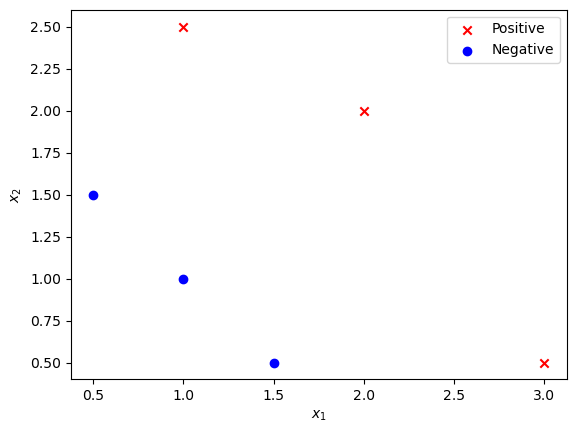

In [34]:
# Visualization
pos = y == 1
neg = y == 0
plt.scatter(X[pos, 0], X[pos, 1], c='red', marker='x', label='Positive')
plt.scatter(X[neg, 0], X[neg, 1], c='blue',marker='o', label='Negative')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

## Decision Boundary

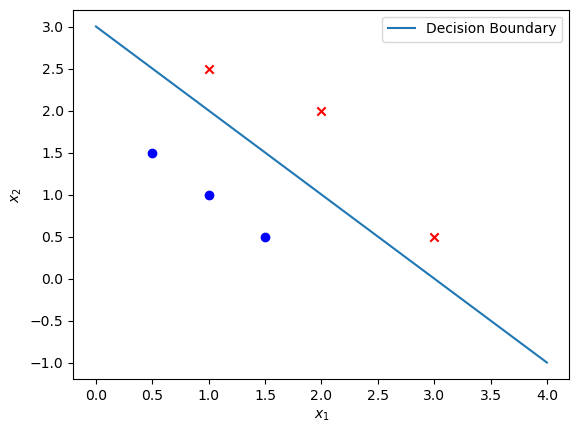

In [36]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Parameters
w = np.array([1, 1])
b = -3

# Decision boundary
x1_vals = np.linspace(0, 4, 100)
x2_vals = - (w[0] * x1_vals + b) / w[1]

plt.plot(x1_vals, x2_vals, label='Decision Boundary')
plt.scatter(X[pos, 0], X[pos, 1], c='red', marker='x')
plt.scatter(X[neg, 0], X[neg, 1], c='blue', marker='o')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

## Cost Function

In [38]:
def compute_cost(X, y, w, b):
    m = len(y)
    cost = 0
    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb = sigmoid(z)
        cost += -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)
    return cost / m

# Example Usage
cost = compute_cost(X, y, w, b)
print(f"Cost: {cost}")

Cost: 0.36686678640551745


## Gradient Descent

In [42]:
def gradient_descent(X, y, w, b, alpha, num_iters):
    m, n = X.shape
    for _ in range(num_iters):
        dj_dw = np.zeros(n)
        dj_db = 0
        for i in range(m):
            z = np.dot(X[i], w) + b
            f_wb = sigmoid(z)
            err = f_wb - y[i]
            dj_dw += err * X[i]
            dj_db += err
        w -= alpha * dj_dw / m
        b -= alpha * dj_db / m
    return w, b

# Run gradient descent
w, b = np.zeros(2), 0
w, b = gradient_descent(X, y, w, b, alpha=0.1, num_iters=1000)
print(f"w: {w}, b: {b:.4f}")

w: [2.30457062 2.07622315], b: -5.9077


## Overfitting and Regularization

In [46]:
def compute_cost_regularized(X, y, w, b, lamda_):
    m = len(y)
    cost = compute_cost(X, y, w, b)
    reg_cost = (lamda_ / (2 * m)) * np.sum(w**2)
    return cost + reg_cost

# Example usage
lamda_ = 0.1
cost_reg = compute_cost_regularized(X, y, w, b, lamda_)
print(f"Regularized Cost: {cost_reg:.4f}")

Regularized Cost: 0.2394


## Using Scikit-Learn

In [67]:
from sklearn.linear_model import LogisticRegression

# Train Model
model = LogisticRegression()
model.fit(X, y)

# Predictions
predictions = model . predict(X)
accuracy = model . score(X, y)
print(f"Predictions: {predictions}")
print(f"Accuracy: {accuracy}")

Predictions: [0. 0. 0. 1. 1. 1.]
Accuracy: 1.0
